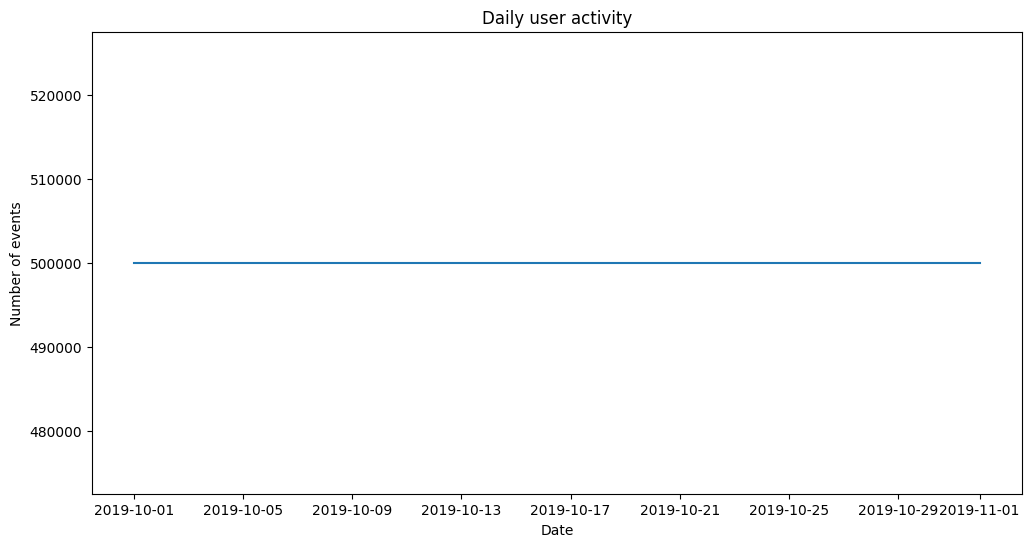

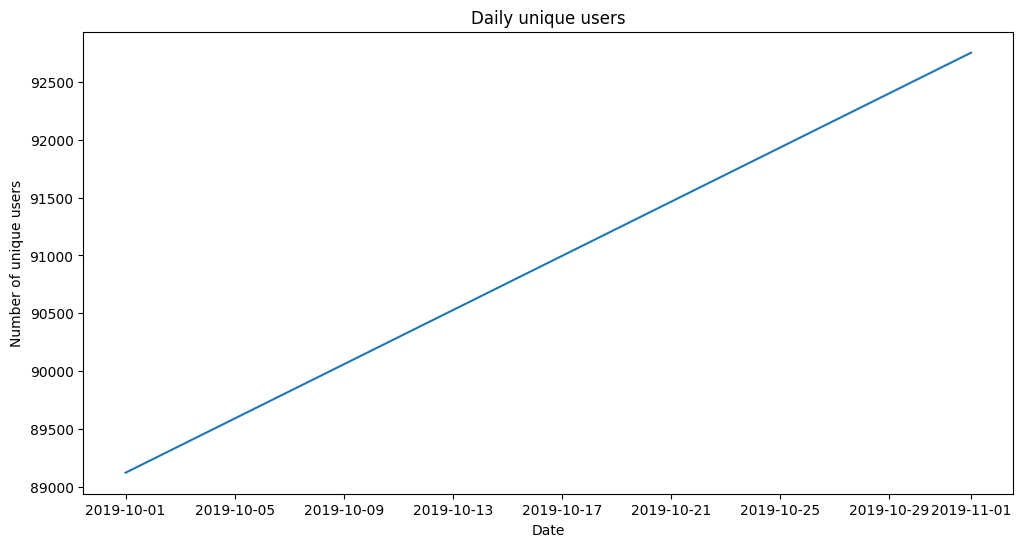

Conversion rate: 2.01%
Average number of events per user: 5.47


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

nov = pd.read_csv('/Users/kaustubhpande/Desktop/practicumdata/2019-Nov.csv', nrows = 500000)
oct = pd.read_csv('/Users/kaustubhpande/Desktop/practicumdata/2019-Oct.csv', nrows = 500000)

# merge the two dataframes on a common column 'id'
data = pd.concat([nov, oct], ignore_index=True)
# Load the data into a Pandas DataFrame
#data = pd.read_csv("your_file.csv")
data.to_csv('/Users/kaustubhpande/Desktop/practicumdata/data.csv', index=False)


# Create a new column to extract the date from the event_time column
data["date"] = pd.to_datetime(data["event_time"]).dt.date

# Aggregate the data by date and count the number of events per user
user_activity = data.groupby(["date", "user_id"])["event_type"].count().reset_index()
user_activity.columns = ["date", "user_id", "events"]

# Aggregate the data by date and count the number of unique users per day
daily_users = data.groupby(["date"])["user_id"].nunique().reset_index()
daily_users.columns = ["date", "users"]

# Plot the daily user activity
plt.figure(figsize=(12,6))
plt.plot(user_activity.groupby("date")["events"].sum())
plt.xlabel("Date")
plt.ylabel("Number of events")
plt.title("Daily user activity")
plt.show()

# Plot the daily number of unique users
plt.figure(figsize=(12,6))
plt.plot(daily_users["date"], daily_users["users"])
plt.xlabel("Date")
plt.ylabel("Number of unique users")
plt.title("Daily unique users")
plt.show()

# Calculate the conversion rate
views = data[data["event_type"] == "view"]
purchases = data[data["event_type"] == "purchase"]
conversion_rate = len(purchases) / len(views) * 100
print("Conversion rate: {:.2f}%".format(conversion_rate))

# Calculate the average number of events per user
avg_events_per_user = user_activity.groupby("user_id")["events"].mean().mean()
print("Average number of events per user: {:.2f}".format(avg_events_per_user))


/var/folders/_9/b018pn5x4n5d103gc56f123c0000gn/T/ipykernel_19079/542781353.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_counts = top_categories.append(pd.Series({"Other": other_count}))


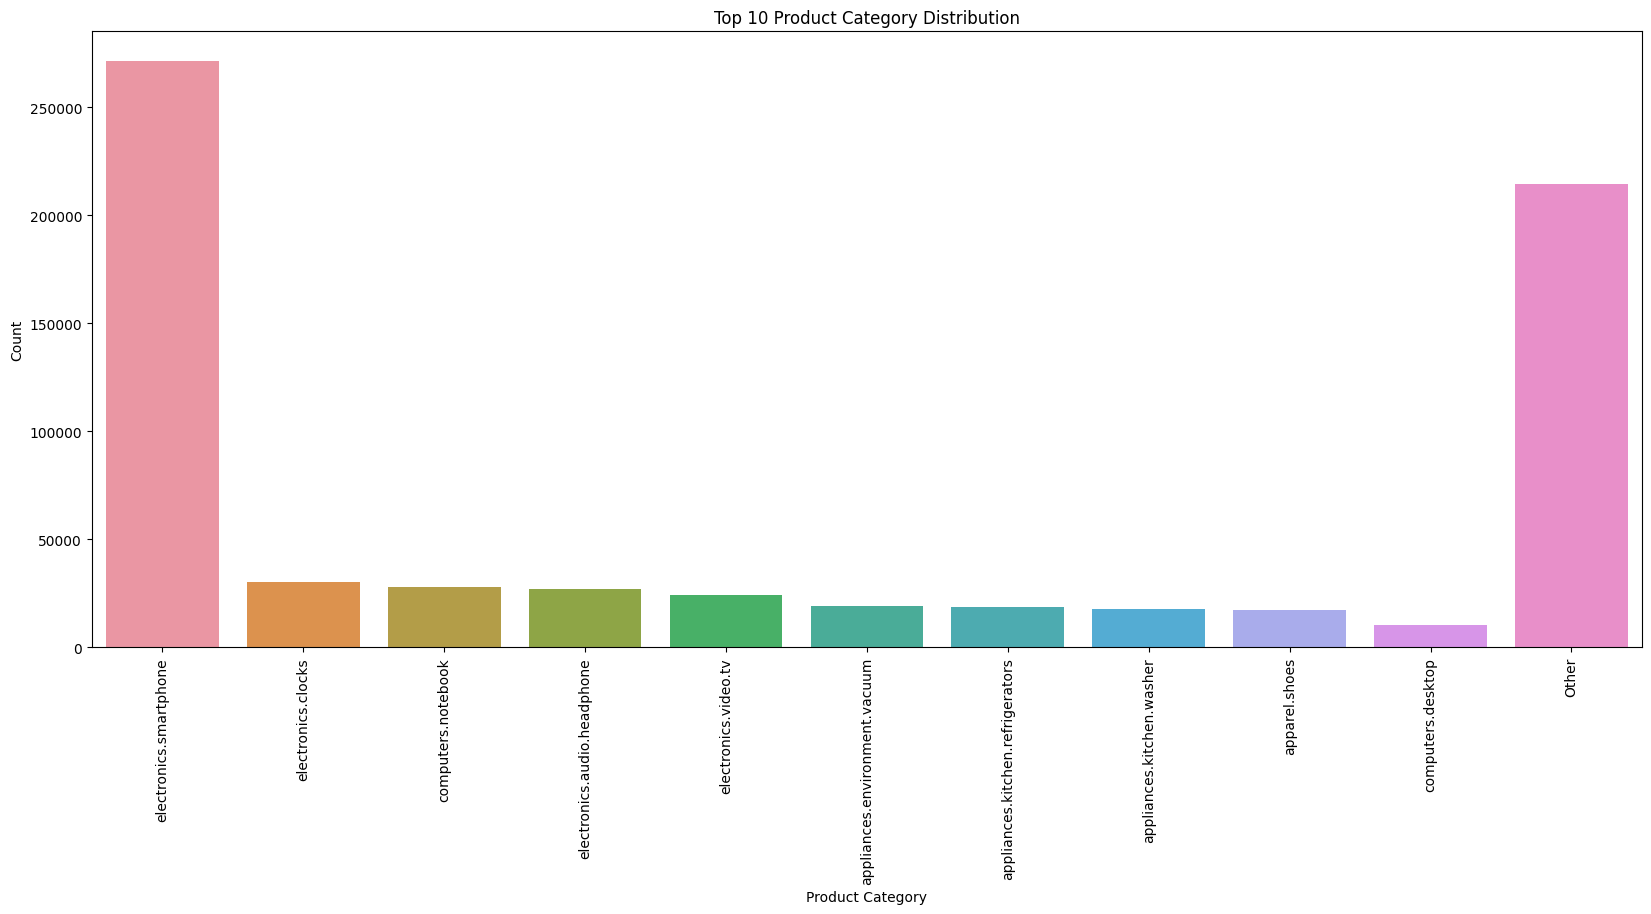

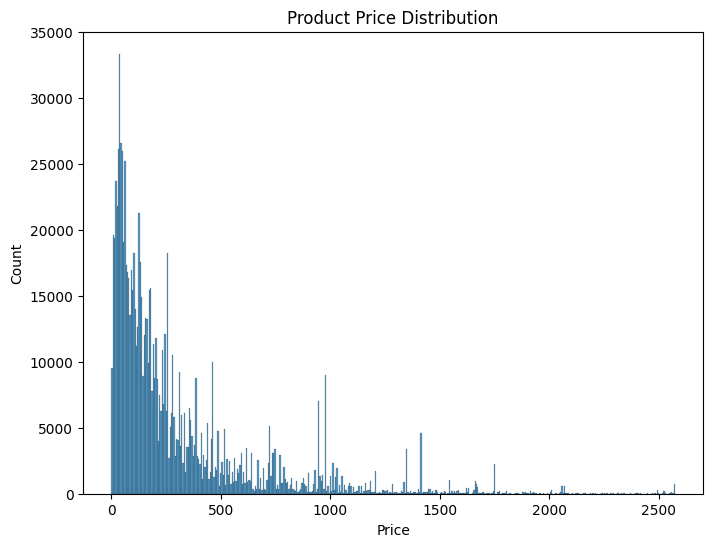

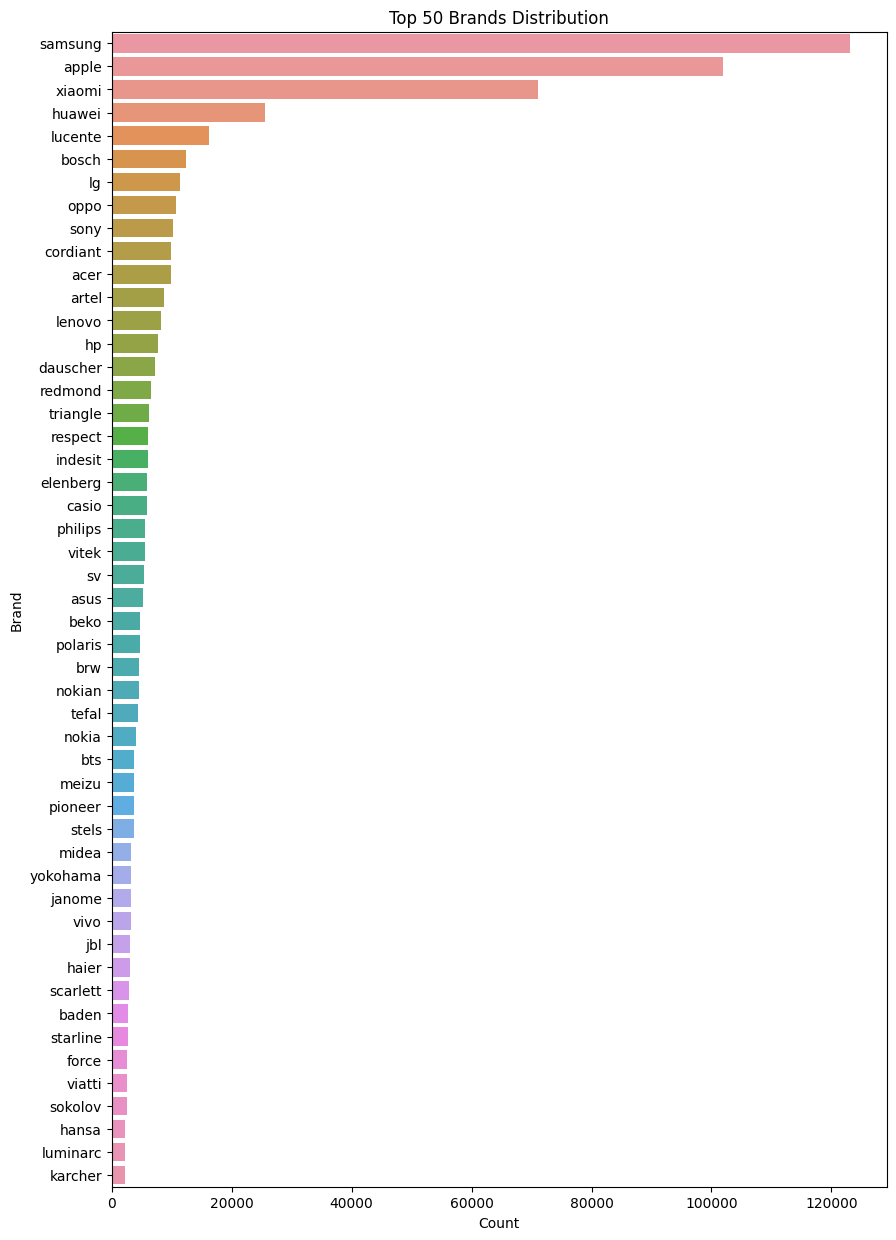

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Analyze product category
# Get the category counts
category_counts = data["category_code"].value_counts()

# Get the top 10 categories and the sum of counts for all other categories
top_categories = category_counts[:10]
other_count = category_counts[10:].sum()

# Create a new Series object that includes the top 10 categories and "Other"
new_counts = top_categories.append(pd.Series({"Other": other_count}))

# Create the bar chart with the new Series object
plt.figure(figsize=(20, 8))
sns.barplot(x=new_counts.index, y=new_counts.values)
plt.title("Top 10 Product Category Distribution")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

# Analyze product price
plt.figure(figsize=(8, 6))
sns.histplot(x=data["price"], kde=False)
plt.title("Product Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

brand_counts = data["brand"].value_counts()

# Get the top 50 brands
top_brands = brand_counts.head(50)

# Create the horizontal bar chart
plt.figure(figsize=(10, 15))
sns.barplot(x=top_brands.values, y=top_brands.index, orient="h")
plt.title("Top 50 Brands Distribution")
plt.xlabel("Count")
plt.ylabel("Brand")
plt.show()



In [50]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load data
# #data = pd.read_csv("e-comm-data-mining-for-smartphone-products.csv")

# # Data exploration
# print(data.head())
# print(data.describe())
# print(data.info())


# # Visualize the distribution of product prices
# sns.histplot(data=data, x='Product Price')
# plt.show()

# # Visualize the distribution of product reviews
# sns.histplot(data=data, x='Product Review Count')
# plt.show()

# # Visualize the relationship between product price and rating
# sns.scatterplot(data=data, x='Product Price', y='Product Rating')
# plt.show()

# # Visualize the relationship between product review count and rating
# sns.scatterplot(data=data, x='Product Review Count', y='Product Rating')
# plt.show()

# # Visualize the distribution of product categories
# sns.countplot(data=data, x='Product Category')
# plt.show()

# # Visualize the average rating by product category
# sns.barplot(data=data, x='Product Category', y='Product Rating')
# plt.show()


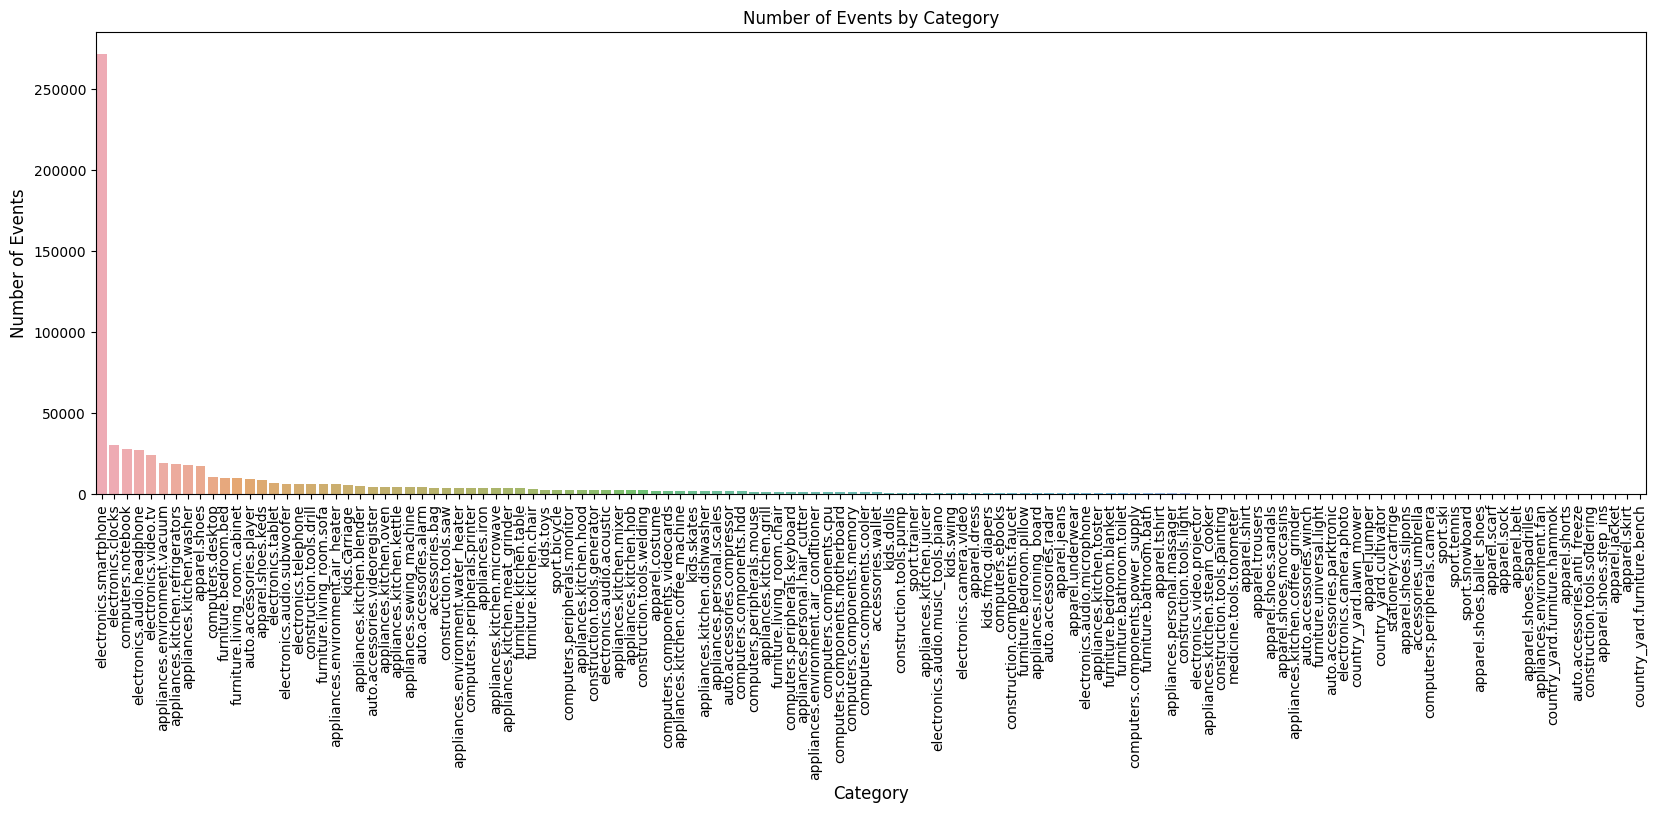

In [9]:
#Tcreate a bar chart showing the number of events (views, adds to cart, purchases) by category, giving us insight into the most popular product categories on the website.
category_counts = data['category_code'].value_counts()
plt.figure(figsize=(20,6))
sns.barplot(x=category_counts.index, y=category_counts.values, alpha=0.8)
plt.title('Number of Events by Category')
plt.ylabel('Number of Events', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=90)
plt.show()


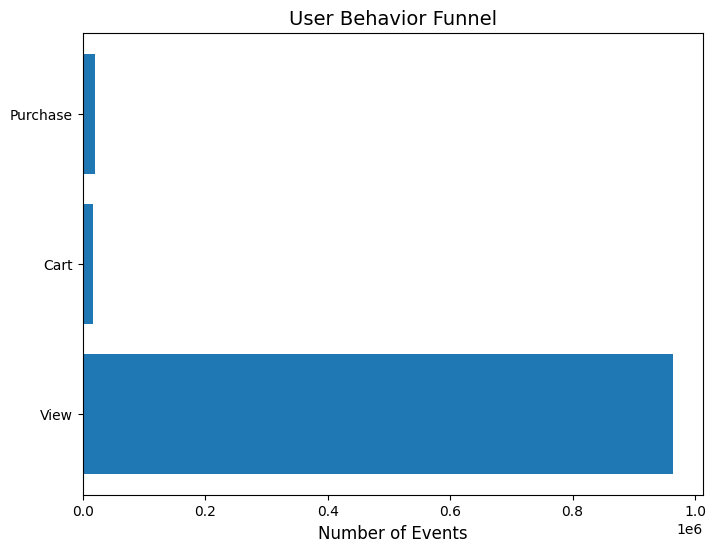

Add-to-cart conversion rate: 1.68%
Purchase conversion rate: 119.67%


In [10]:
#create a horizontal bar chart showing the number of events for each user behavior, as well as calculate the conversion rates from view to add-to-cart and add-to-cart to purchase.
behavior_counts = data['event_type'].value_counts()
view_count = behavior_counts['view']
cart_count = behavior_counts['cart']
purchase_count = behavior_counts['purchase']

plt.figure(figsize=(8,6))
plt.barh(['View', 'Cart', 'Purchase'], [view_count, cart_count, purchase_count])
plt.xlabel('Number of Events', fontsize=12)
plt.title('User Behavior Funnel', fontsize=14)
plt.show()

addtocart_rate = cart_count / view_count
purchase_rate = purchase_count / cart_count

print('Add-to-cart conversion rate: {:.2f}%'.format(addtocart_rate * 100))
print('Purchase conversion rate: {:.2f}%'.format(purchase_rate * 100))


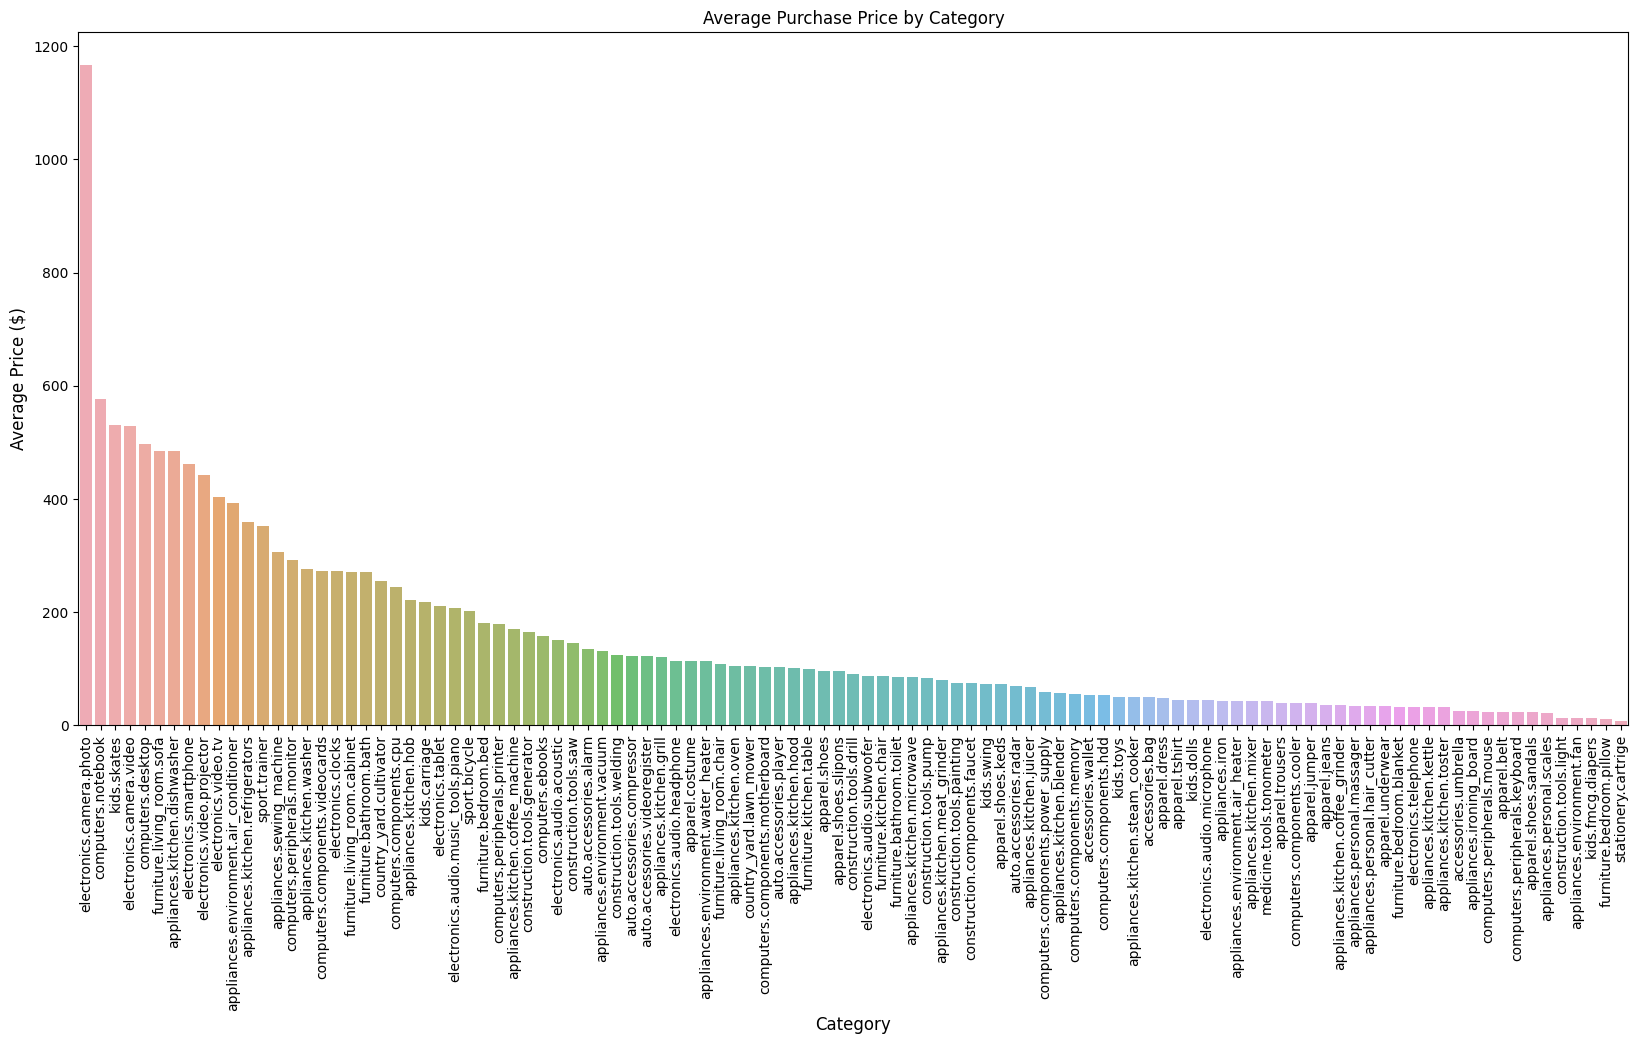

In [11]:
#create a bar chart showing the average purchase price for each product category.
category_prices = data[data['event_type']=='purchase'].groupby('category_code')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(20,9))
sns.barplot(x=category_prices.index, y=category_prices.values, alpha=0.8)
plt.title('Average Purchase Price by Category')
plt.ylabel('Average Price ($)', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=90)
plt.show()


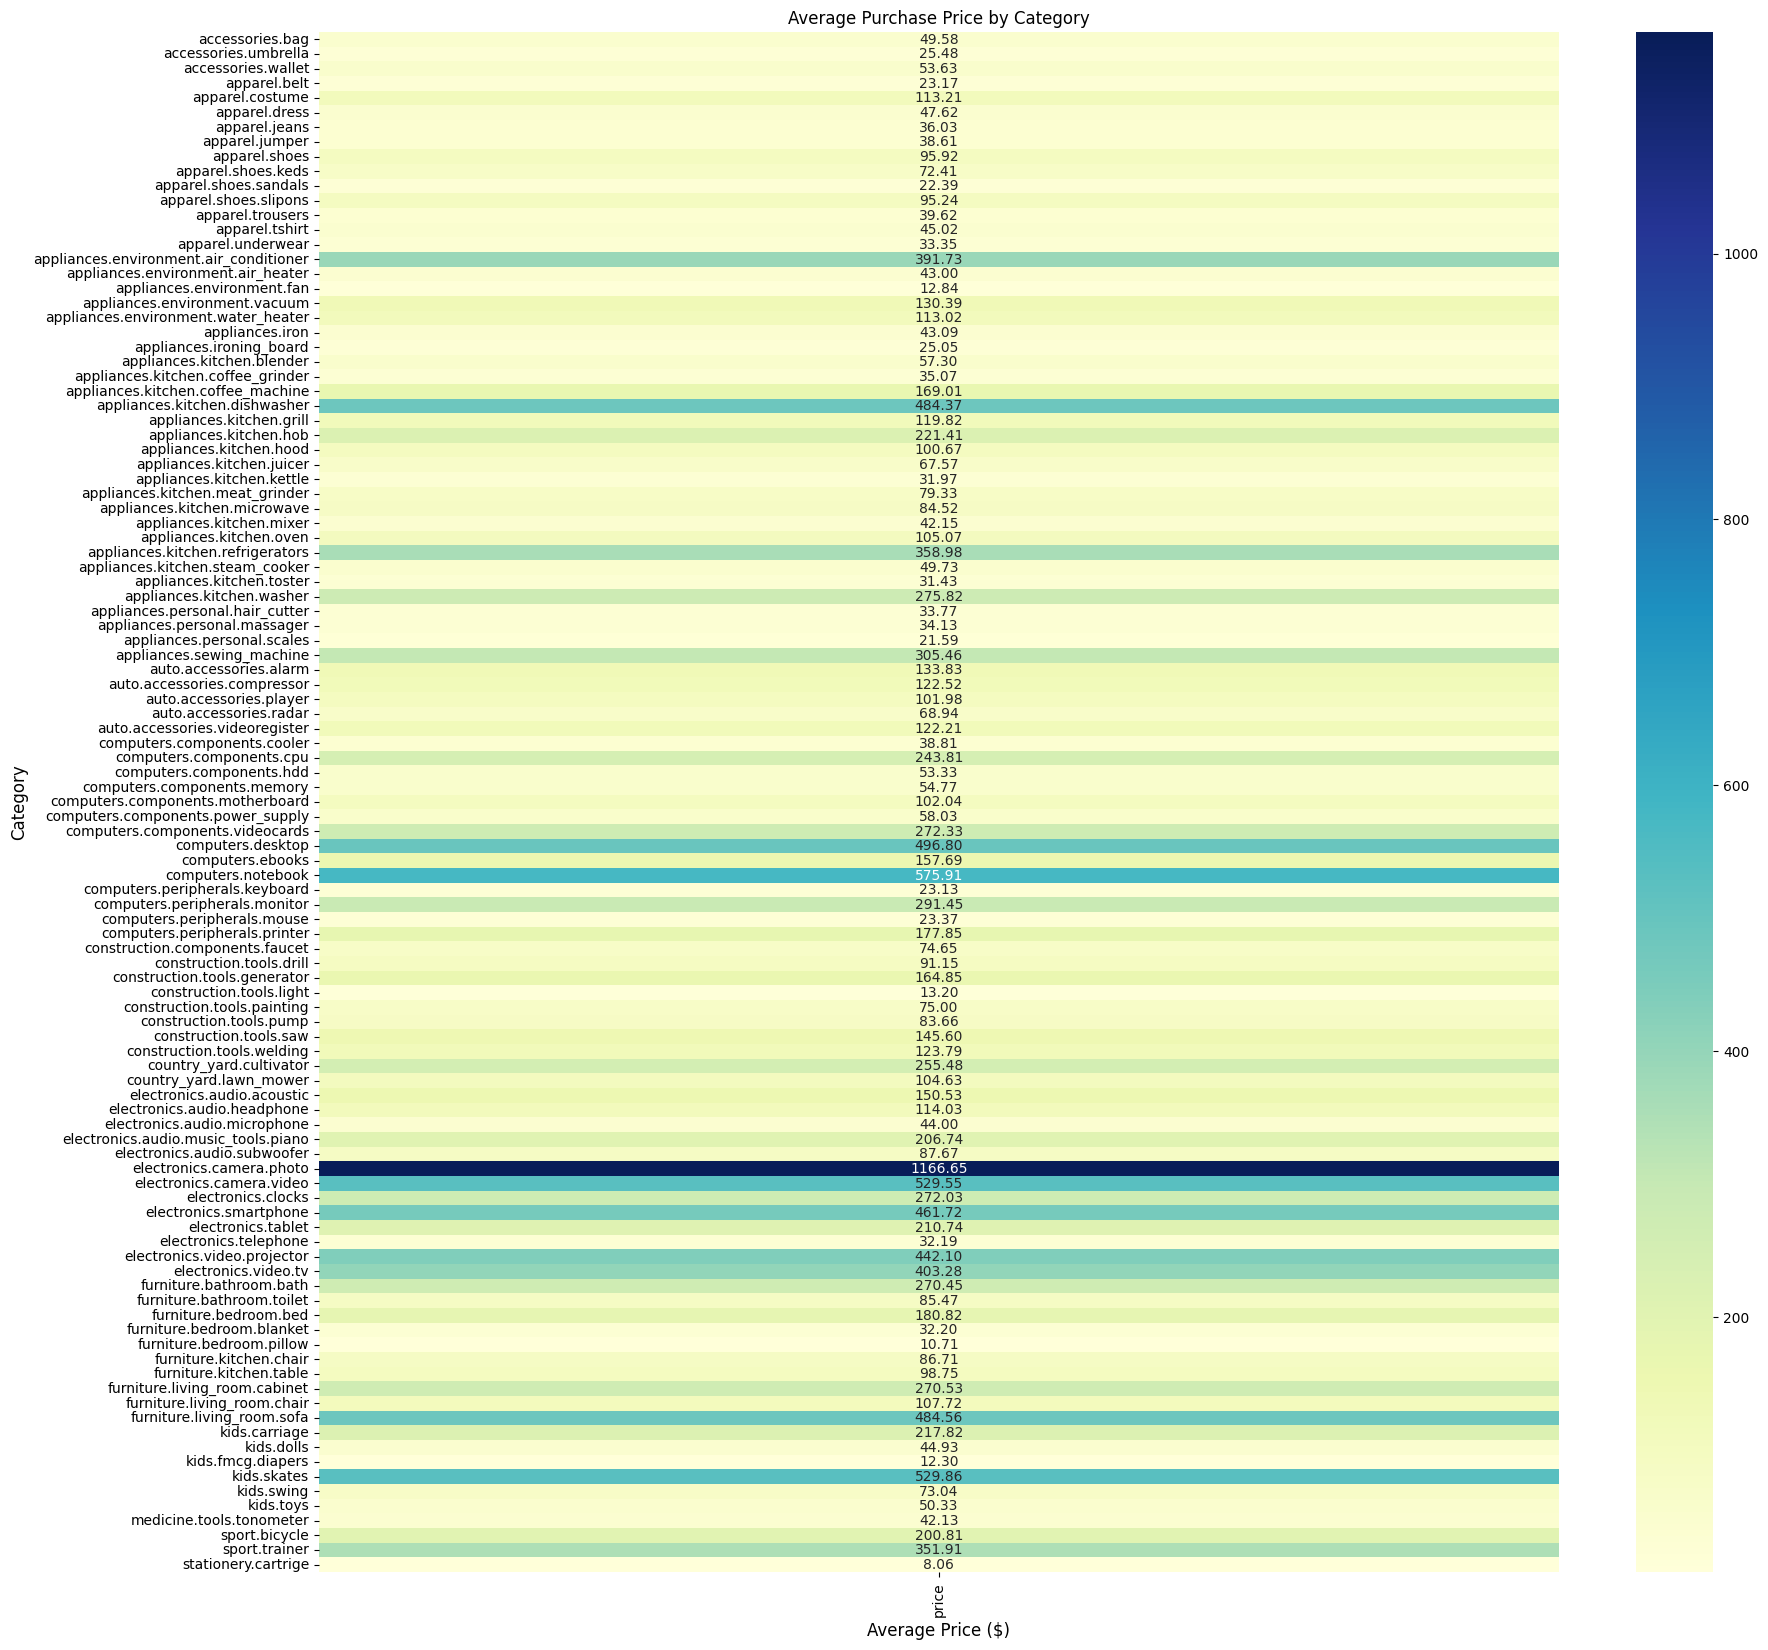

In [39]:
# Filter only purchase events and group by category code
category_prices = data[data['event_type'] == 'purchase'].groupby('category_code')['price'].mean()

# Get top 10 categories by average purchase price
top_category_prices = category_prices.nlargest(10)

# Calculate the sum of the remaining categories
other_prices = category_prices[~category_prices.index.isin(top_category_prices.index)].sum()

# Add 'Other' category with the sum of remaining prices to top categories
top_category_prices['Other'] = other_prices

# Plot the data in a heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data=pd.pivot_table(data=data[data['event_type']=='purchase'], index='category_code', values='price', aggfunc='mean'), cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Average Purchase Price by Category')
plt.ylabel('Category', fontsize=12)
plt.xlabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=90)

plt.show()


In [13]:
#Traffic and user engagement
# Number of unique users
n_users = data['user_id'].nunique()
print('Number of unique users:', n_users)

# Number of unique products
n_products = data['product_id'].nunique()
print('Number of unique products:', n_products)

# Average number of interactions per user
interactions_per_user = data.groupby('user_id').size().mean()
print('Average number of interactions per user:', interactions_per_user)

# Average number of interactions per product
interactions_per_product = data.groupby('product_id').size().mean()
print('Average number of interactions per product:', interactions_per_product)

# Conversion rate
n_purchases = data[data['event_type'] == 'purchase'].shape[0]
conversion_rate = n_purchases / n_users
print('Conversion rate:', conversion_rate)


Number of unique users: 177641
Number of unique products: 71091
Average number of interactions per user: 5.629331066589357
Average number of interactions per product: 14.06647817585911
Conversion rate: 0.10894444413170383


In [40]:
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,2019-11-01
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,2019-11-01
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,2019-11-01
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,2019-11-01
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,2019-11-01
...,...,...,...,...,...,...,...,...,...,...
999995,2019-10-01 10:22:43 UTC,view,26400368,2053013563651392361,NaN,NaN,194.86,555334137,c74f934a-0713-4a75-a670-1e776c02192d,2019-10-01
999996,2019-10-01 10:22:43 UTC,view,23300957,2053013561956893455,NaN,NaN,36.04,516063919,e8872734-9d35-4c12-92e0-01452dc2635f,2019-10-01
999997,2019-10-01 10:22:43 UTC,view,10900328,2053013555069845885,appliances.kitchen.mixer,dauscher,12.84,529522881,c21547fb-d417-4096-bba1-60582f4732a0,2019-10-01
999998,2019-10-01 10:22:43 UTC,view,5701114,2053013553970938175,auto.accessories.player,prology,25.74,516810731,d7ecd02e-f15f-4f7a-8e43-07e6db9e717d,2019-10-01


In [14]:
#Sales and Revenue
# Total sales
total_sales = data[data['event_type'] == 'purchase']['price'].sum()
print('Total sales:', total_sales)

# Average order value
average_order_value = data[data['event_type'] == 'purchase']['price'].mean()
print('Average order value:', average_order_value)

# Revenue per user
revenue_per_user = data[data['event_type'] == 'purchase'].groupby('user_id')['price'].sum().mean()
print('Revenue per user:', revenue_per_user)


Total sales: 6013185.7700000005
Average order value: 310.7107823076526
Revenue per user: 412.3138898793198


In [15]:
#Product Performance
# Top 10 most viewed products
top_viewed_products = data[data['event_type'] == 'view'].groupby('product_id').size().nlargest(10)
print('Top 10 most viewed products:')
print(top_viewed_products)

# Top 10 most purchased products
top_purchased_products = data[data['event_type'] == 'purchase'].groupby('product_id').size().nlargest(10)
print('Top 10 most purchased products:')
print(top_purchased_products)

# Top 10 most purchased brands
top_purchased_products = data[data['event_type'] == 'purchase'].groupby('brand').size().nlargest(10)
print('Top 10 most purchased brands:')
print(top_purchased_products)

Top 10 most viewed products:
product_id
1004856    10723
1005115     9781
1004767     8398
1005105     5539
1004870     5154
1004249     5130
1004833     4668
4804056     4405
1002544     4298
5100816     3918
dtype: int64
Top 10 most purchased products:
product_id
1004856    887
1004767    597
1005115    400
1004833    345
1002544    325
1004870    298
4804056    293
1004249    247
1004836    190
1005105    190
dtype: int64
Top 10 most purchased brands:
brand
samsung     4674
apple       3720
xiaomi      1432
huawei       604
lucente      307
cordiant     303
oppo         269
lg           219
artel        186
triangle     185
dtype: int64


In [16]:
# #User Behavior
# # Average time between first and last interaction per user
# user_lifetime = data.groupby('user_id')['event_time'].agg(lambda x: x.max() - x.min())
# avg_user_lifetime = user_lifetime.mean()
# print('Average user lifetime:', avg_user_lifetime)

# # Repeat purchase rate
# repeat_purchase_rate = data[data['Event_Type'] == 'purchase'].groupby('User_ID').size().value_counts(normalize=True).iloc[0]
# print('Repeat purchase rate:', repeat_purchase_rate)


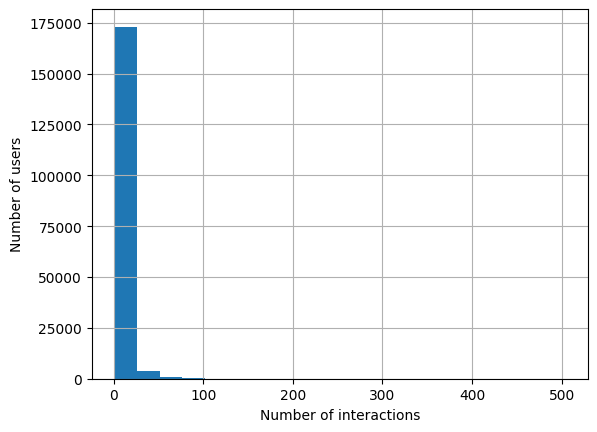

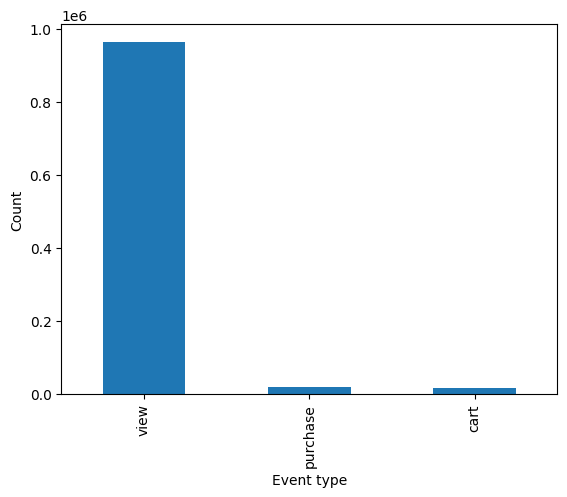

In [17]:
# Histogram of interactions per user
data.groupby('user_id').size().hist(bins=20)
plt.xlabel('Number of interactions')
plt.ylabel('Number of users')
plt.show()

# Bar chart of event types
data['event_type'].value_counts().plot(kind='bar')
plt.xlabel('Event type')
plt.ylabel('Count')
plt.show()

In [1]:
# Import necessary libraries
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
#df = pd.read_csv('e-commerce-dataset.csv')

# Clean the data
#df = df[['user_id', 'Product_ID']].drop_duplicates()

# Create a user-item matrix
user_item_matrix = data.pivot_table(index='user_id', columns='product_id', aggfunc=len, fill_value=0)

# Calculate item similarities
item_sim_matrix = cosine_similarity(user_item_matrix.T)

# Make recommendations
def get_recommendations(user_id, n):
    user_purchases = user_item_matrix.loc[user_id]
    sim_scores = item_sim_matrix.dot(user_purchases)
    sim_scores = sim_scores.drop(user_purchases.index)
    sim_scores = sim_scores.sort_values(ascending=False)[:n]
    recommendations = pd.DataFrame({'Product_ID': sim_scores.index})
    return recommendations

# Test the recommendation system
get_recommendations('561587266', 2)


In [28]:
# #import pandas as pd
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import MinMaxScaler
# import numpy as np


# # Impute missing values in 'category_id' and 'brand' columns with the most frequent value
# imputer = SimpleImputer(strategy='most_frequent')
# data[['category_id', 'brand', 'category_code']] = imputer.fit_transform(data[['category_id', 'brand','category_code']])

# # Impute missing values in 'price' column with the median value
# imputer = SimpleImputer(strategy='median')
# data['price'] = imputer.fit_transform(data[['price']])

# # Convert 'event_time' column to datetime format
# data['event_time'] = pd.to_datetime(data['event_time'])

# # Remove duplicates
# data.drop_duplicates(inplace=True)

# # Extract the day of the week and hour of the day as new columns
# data["day_of_week"] = data["event_time"].dt.dayofweek # Monday is 0 and Sunday is 6
# data["hour_of_day"] = data["event_time"].dt.hour  # Integer between 0 and 23, with 0 representing midnight and 23 representing 11 PM


# # Remove the "user_session" column
# #data.drop(['user_session'], axis=1, inplace=True)

# # Encode the "category_id" and "product_id" columns using LabelEncoder to convert them to numerical values
# le = LabelEncoder()
# data['category_id'] = le.fit_transform(data['category_id'])
# data['product_id'] = le.fit_transform(data['product_id'])

# # Normalize the "event_type" column by converting "view" to 1 and "cart" and "purchase" to 1, 2 and 3, respectively
# data['event_type'] = data['event_type'].map({'view': 1, 'cart': 2, 'purchase': 3})

# # Scale the numerical columns to values between 0 and 1
# scaler = MinMaxScaler()
# data[['price', 'category_id', 'product_id', 'event_type', 'day_of_week', 'hour_of_day']] = scaler.fit_transform(data[['price', 'category_id', 'product_id', 'event_type', 'day_of_week', 'hour_of_day']])


In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder


# Impute missing values in 'category_id' and 'brand' columns with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
data[['category_id', 'brand', 'category_code']] = imputer.fit_transform(data[['category_id', 'brand','category_code']])

# Impute missing values in 'price' column with the median value
imputer = SimpleImputer(strategy='median')
data['price'] = imputer.fit_transform(data[['price']])

# Convert 'event_time' column to datetime format
data['event_time'] = pd.to_datetime(data['event_time'])

# Remove duplicates
data.drop_duplicates(inplace=True)

# Extract the day of the week and hour of the day as new columns
data["day_of_week"] = data["event_time"].dt.dayofweek # Monday is 0 and Sunday is 6
data["hour_of_day"] = data["event_time"].dt.hour  # Integer between 0 and 23, with 0 representing midnight and 23 representing 11 PM

# One-hot encode the 'product_id', 'event_type', 'day_of_week', and 'hour_of_day' columns
one_hot_encoder = OneHotEncoder()
product_id_encoded = one_hot_encoder.fit_transform(data[['product_id']])
event_type_encoded = one_hot_encoder.fit_transform(data[['event_type']])
day_of_week_encoded = one_hot_encoder.fit_transform(data[['day_of_week']])
hour_of_day_encoded = one_hot_encoder.fit_transform(data[['hour_of_day']])

# Concatenate the one-hot encoded columns to the original DataFrame
data_encoded = pd.concat([data, pd.DataFrame(product_id_encoded.toarray()), pd.DataFrame(event_type_encoded.toarray()), pd.DataFrame(day_of_week_encoded.toarray()), pd.DataFrame(hour_of_day_encoded.toarray())], axis=1)

# Drop the original 'product_id', 'event_type', 'day_of_week', and 'hour_of_day' columns
data_encoded.drop(['product_id', 'event_type', 'day_of_week', 'hour_of_day'], axis=1, inplace=True)

# Encode the "category_id" column using LabelEncoder to convert them to numerical values
le = LabelEncoder()
data_encoded['category_id'] = le.fit_transform(data_encoded['category_id'])

# Scale the numerical columns to values between 0 and 1
scaler = MinMaxScaler()
data_encoded[['price', 'category_id']] = scaler.fit_transform(data_encoded[['price', 'category_id']])


In [ ]:
data

In [29]:

# Import necessary classes from LightFM package
from lightfm import LightFM
from lightfm.data import Dataset
from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import precision_at_k

# Load the dataset
#df = pd.read_csv("Behavior_Data_from_Multi_Category_Store.csv")

# Convert the dataset to LightFM format
dataset = Dataset()
dataset.fit(data['user_id'], data['product_id'])
interactions, _ = dataset.build_interactions((row['user_id'], row['product_id'], 1) for index, row in data.iterrows())

# Split the dataset into training and testing sets
train, test = random_train_test_split(interactions, test_percentage=0.2, random_state=42)

# Create an instance of the LightFM algorithm
model = LightFM(loss='warp')

# Train the algorithm on the training set
model.fit(train, epochs=10)

# Evaluate the performance of the algorithm using precision@k
precision = precision_at_k(model, test, k=5).mean()


In [30]:
precision

0.030932993

In [3]:
from sklearn.model_selection import train_test_split
from surprise import SVD
from surprise import Dataset
from surprise import Reader

# Load the data into a Surprise dataset
reader = Reader(rating_scale=(1, 3))
df = Dataset.load_from_df(data[['user_id', 'product_id', 'event_type']], reader)

# Split the data into training and test sets
trainset, testset = train_test_split(df, test_size=0.2)

# Get the complete training set as a Dataset object
trainset = trainset.build_full_trainset()

# Train the recommendation system using Singular Value Decomposition (SVD)
algo = SVD()
algo.fit(trainset)

# Make recommendations for the test set
predictions = algo.test(testset)

# Evaluate the performance of the recommendation system using RMSE
from surprise import accuracy
accuracy.rmse(predictions)


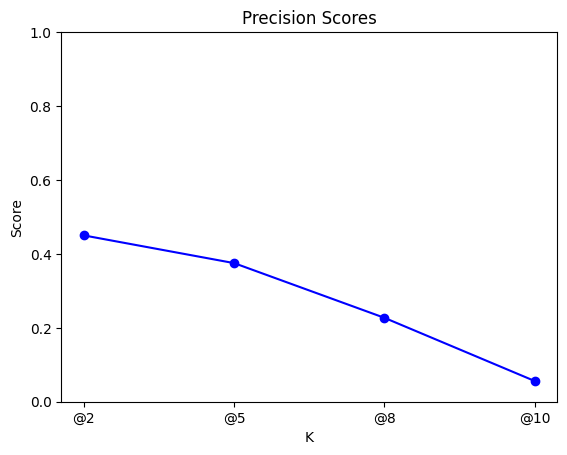

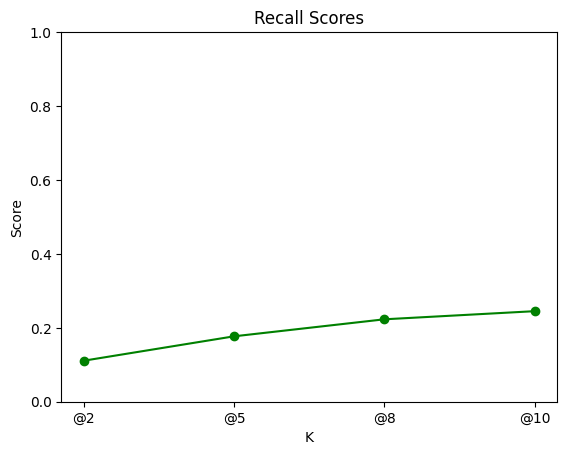

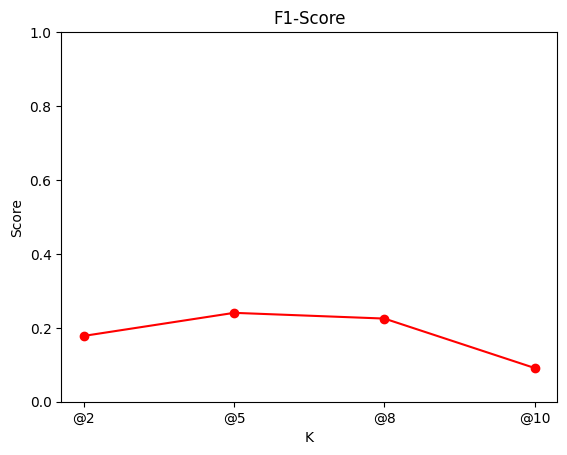

In [23]:
import matplotlib.pyplot as plt

# Data
precision2 = 0.450
recall2 = 0.111
precision5 = 0.375
recall5 = 0.177
precision8 = 0.227
recall8 = 0.223
precision10 = 0.056
recall10 = 0.245

# Calculate F1-score
f1_score2 = 2 * (precision2 * recall2) / (precision2 + recall2)
f1_score5 = 2 * (precision5 * recall5) / (precision5 + recall5)
f1_score8 = 2 * (precision8 * recall8) / (precision8 + recall8)
f1_score10 = 2 * (precision10 * recall10) / (precision10 + recall10)

# Plot precision
x = ['@2', '@5', '@8', '@10']
y = [precision2, precision5, precision8, precision10]

plt.plot(x, y, marker='o', color='blue')
plt.title('Precision Scores')
plt.xlabel('K')
plt.ylabel('Score')
plt.ylim([0,1])
plt.show()

# Plot recall
x = ['@2', '@5', '@8', '@10']
y = [recall2, recall5, recall8, recall10]

plt.plot(x, y, marker='o', color='green')
plt.title('Recall Scores')
plt.xlabel('K')
plt.ylabel('Score')
plt.ylim([0,1])
plt.show()

# Plot F1-score
x = ['@2', '@5', '@8', '@10']
y = [f1_score2, f1_score5, f1_score8, f1_score10]

plt.plot(x, y, marker='o', color='red')
plt.title('F1-Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.ylim([0,1])
plt.show()


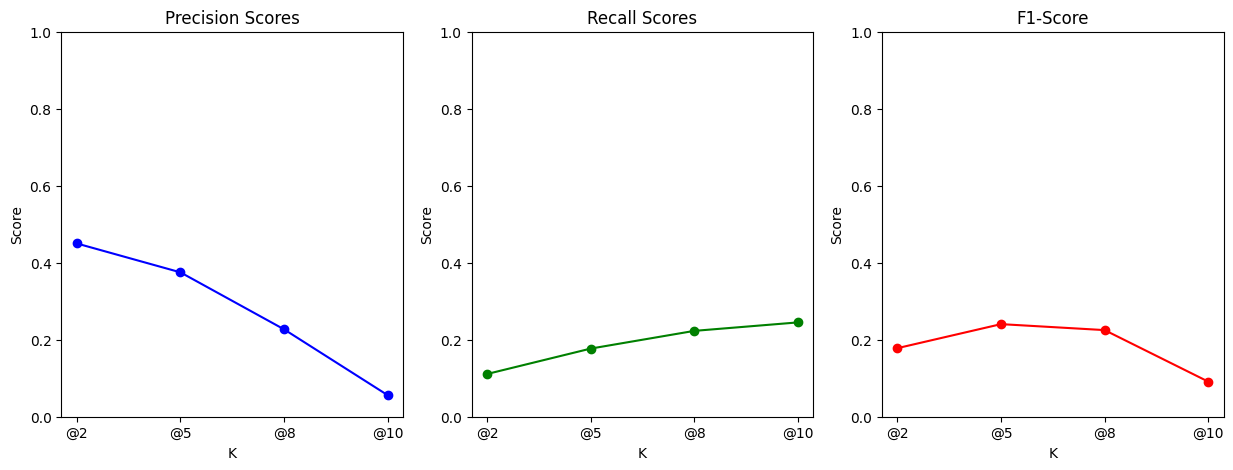

In [24]:
import matplotlib.pyplot as plt

# Data
precision2 = 0.450
recall2 = 0.111
precision5 = 0.375
recall5 = 0.177
precision8 = 0.227
recall8 = 0.223
precision10 = 0.056
recall10 = 0.245

# Calculate F1-score
f1_score2 = 2 * (precision2 * recall2) / (precision2 + recall2)
f1_score5 = 2 * (precision5 * recall5) / (precision5 + recall5)
f1_score8 = 2 * (precision8 * recall8) / (precision8 + recall8)
f1_score10 = 2 * (precision10 * recall10) / (precision10 + recall10)

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

# Plot precision
x = ['@2', '@5', '@8', '@10']
y1 = [precision2, precision5, precision8, precision10]

ax1.plot(x, y1, marker='o', color='blue')
ax1.set_title('Precision Scores')
ax1.set_xlabel('K')
ax1.set_ylabel('Score')
ax1.set_ylim([0,1])

# Plot recall
y2 = [recall2, recall5, recall8, recall10]

ax2.plot(x, y2, marker='o', color='green')
ax2.set_title('Recall Scores')
ax2.set_xlabel('K')
ax2.set_ylabel('Score')
ax2.set_ylim([0,1])

# Plot F1-score
y3 = [f1_score2, f1_score5, f1_score8, f1_score10]

ax3.plot(x, y3, marker='o', color='red')
ax3.set_title('F1-Score')
ax3.set_xlabel('K')
ax3.set_ylabel('Score')
ax3.set_ylim([0,1])

# Display plot
plt.show()


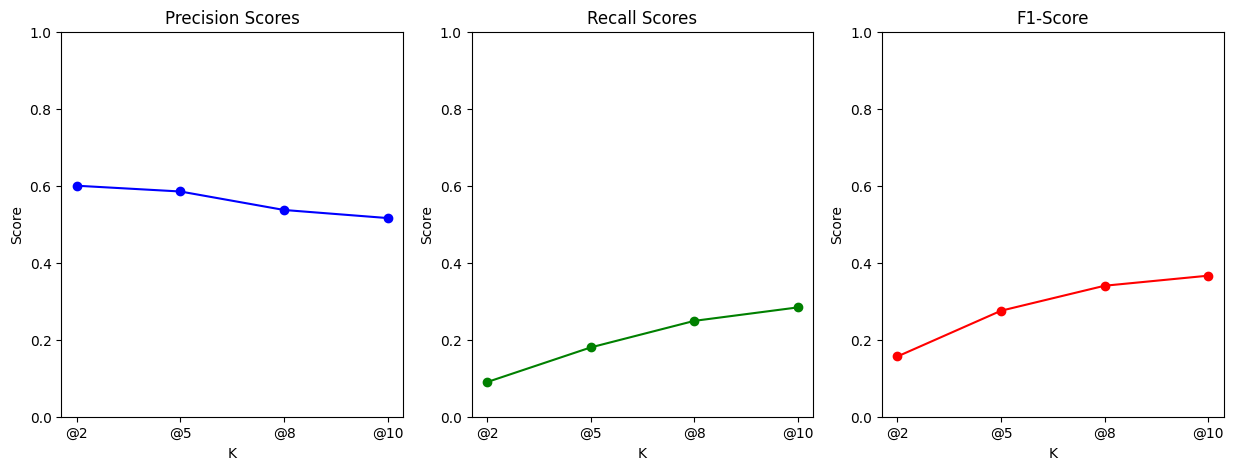

In [25]:
import matplotlib.pyplot as plt

# Data
precision2 = 0.600
recall2 = 0.090
precision5 = 0.585
recall5 = 0.180
precision8 = 0.537
recall8 = 0.249
precision10 = 0.516
recall10 = 0.284

# Calculate F1-score
f1_score2 = 2 * (precision2 * recall2) / (precision2 + recall2)
f1_score5 = 2 * (precision5 * recall5) / (precision5 + recall5)
f1_score8 = 2 * (precision8 * recall8) / (precision8 + recall8)
f1_score10 = 2 * (precision10 * recall10) / (precision10 + recall10)

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

# Plot precision
x = ['@2', '@5', '@8', '@10']
y1 = [precision2, precision5, precision8, precision10]

ax1.plot(x, y1, marker='o', color='blue')
ax1.set_title('Precision Scores')
ax1.set_xlabel('K')
ax1.set_ylabel('Score')
ax1.set_ylim([0,1])

# Plot recall
y2 = [recall2, recall5, recall8, recall10]

ax2.plot(x, y2, marker='o', color='green')
ax2.set_title('Recall Scores')
ax2.set_xlabel('K')
ax2.set_ylabel('Score')
ax2.set_ylim([0,1])

# Plot F1-score
y3 = [f1_score2, f1_score5, f1_score8, f1_score10]

ax3.plot(x, y3, marker='o', color='red')
ax3.set_title('F1-Score')
ax3.set_xlabel('K')
ax3.set_ylabel('Score')
ax3.set_ylim([0,1])

# Display plot
plt.show()
